<a href="https://colab.research.google.com/github/jinsusong/study-NLP-IEEE-Paper/blob/main/Irony_Detection_in_Non_English_Tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Irony Detection in Non-English Tweets

# Related Work

- 기계학습 기법 
    1. 가우시안 나이브 베이즈  : 머신러닝 , 확률 분류 
    2. SVM : 머신러닝 , 분류 

    3. POS 태깅 : 품사 태깅 ,  하나의 단어는 하나 이상의 품사를 갖는다.
        -  영어 단어 중, 대부분(88.5%)은 중의적이지 않다. 11.5%의 word type만 중의적이다.
        - 하지만, 40% 이상의 word tokens은 중의적이다. 다시 말해, 자주 쓰이는 단어의 대부분은 중의적이다. 

    4. 각 단어의 빈도를 찾음.

    5. WordNet : WordNet을 사용하여 각 단어의 동의어 빈도도 포함
        - WordNet은 프린스턴 대학교에서 구축한 유의어 DB인데, 유의어 사이의 관계를 그래프로 정의하고 있는 방대한 데이터입니다. 
        - 이 WordNet을 이용하여 유사한 단어를 파악할 수 있고, 각 단어의 유사도를 계산할 수 있습니다. 이를 파이썬의 NLTK를 이용해 활용할 수 있음.
    6. PageRank : 
        - 핵심 아이디어 : 
        - 링크 정보를 이용하여 노드(페이지)마다 점수(순위)를 매기자
그렇다면 어떤 노드에 높은 점수를 줄 것인가?
        - 많은 링크를 받는 페이지 → 높은 점수
        - 높은 점수의 페이지로부터 링크를 받으면 → 높은 점수


- 딥러닝 기법
    1. CNN(Convolutional Neural Networks)
    2. Recursive Neural Networks
    3. DNN(Deep Neural Networks)
    4. RNN(Recurrent Neural Networks)
    5. Deep Belief Networks 
    6. Hybrid Neural Networks

    - 구문 수준과 문장 루트 수준에서 모델을 평가
    - 영어 아이러니 트윗을 분류하기 위해 단어 임베딩과 함께 CNN, RNN 및 Attentive RNN의 세 가지 모델을 사용
    - LSTM 장치를 사용하는 Attentive RNN이 세 가지 모델 중에서 최고의 F1 점수를 산출했다고 언급했습니다
    - 스페인어 트위터 데이터에서 Transformer Encoder 모델을 테스트했습니다. 그들은 데이터 간의 모든 관계를 고려하면서 순환 신경망의 도움 없이 아이러니를 감지하는 것을 목표
    - 여러 딥 러닝 기술을 결합하여 영어 트윗을 비꼬거나 비꼬는 것으로 분류, CNN의 출력은 LSTM에 연결되어 출력이 DNN의 입력
    - 왜곡된 데이터 세트의 정서 극성을 식별하기 위해 sub-word analysis을 사용





# Propose 

1. 기계 학습 기법
    - 이 방법은 문자가 아닌 값을 제거하고 제공된 데이터 세트에 있는 모든 단어에서 말뭉치를 생성합니다. 
    - 그런 다음 카운트 벡터라이저를 사용하여 벡터화됩니다. 
    - 데이터 세트는 각 토큰과 해당 개수가 포함된 행렬로 변환됩니다. 
    - 학습 데이터와 테스트 데이터로 나뉘며 20%는 테스트용이고 나머지는 모델 학습용입니다.

    - 전처리된 데이터는 Nearest Neighbors, Decision Tree, Random Forest, AdaBoost, Naive Bayes, SVM Linear, SVM RBF, SVM Sigmoid 등 다양한 모델을 통해 실행됩니다. 
    - 분류 보고서가 생성됩니다. 그림 1 은 방법론을 보여줍니다.

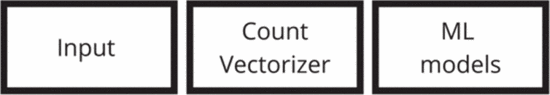

2. LSTM 모델 
    - 데이터 세트는 세 가지 다른 언어(아랍어, 프랑스어 및 힌디어-영어 코드 혼합)로 훈련되고 테스트
    - 데이터 세트가 로드되었습니다. 그런 다음 상위 5000 단어로 제한
    - 모델링을 위해 동일한 길이가 되도록 잘리고 패딩
    - 첫 번째 레이어는 패딩된 입력의 최대 크기를 각 단어를 나타내는 데 사용되는 벡터의 길이로 사용하는 임베딩 레이어
    - 과적합을 방지하기 위해 비율이 0.3인 드롭아웃 레이어가 사용
    - LSTM 레이어입니다. 스택 레이어는 적절하게 모델링하기 위해 더 많은 은닉 유닛이 필요하기 때문에 단어 수준 모델의 성능을 돕습니다. 마지막으로 2개의 뉴런과 softmax 활성화 함수가 있는 Dense 출력 레이어가 추가

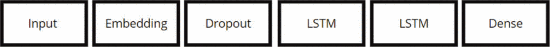

3. sub word analysis
    -  데이터 세트에서 문자 임베딩 세트를 생성한 후 1D 컨볼루션 레이어를 사용하여 sub word  세트가 생성
    - 1차원 최대 풀링 계층은 결국 두 개의 LSTM 계층에 대한 입력을 형성하는 최상위 기능을 얻는 데 도움이 됨.
    - FFNN 완전히 연결된 계층으로 전달
    - 과적합을 방지하기 위해 배치 정규화 및 조기 중지가 사용됨
    - 3개의 epoch 후에도 검증 손실이 개선되지 않으면 모델 학습이 중지

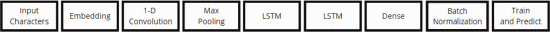

4. TF-IDF 모델 
    - TF-IDF 모델은 TF-IDF 벡터화를 사용하여 데이터 세트의 특징을 추출
    - 유니그램과 바이그램을 모두 고유한 단어의 수로 특징의 수와 함께 사용하여 이 표현이 신경망으로 전달
    - 조밀한 레이어, 0.5의 드롭아웃 및 완전히 연결된 소프트맥스 레이어로 구성
    - 모델이 과적합되는 것을 방지하기 위해 드롭아웃은 0.5로 높게 설정
    - 조기 정지를 사용
    - 5개의 epoch 후에도 검증 손실이 개선되지 않으면 훈련이 중지

    

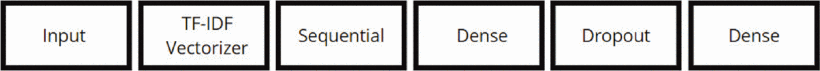